In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import os
import xlwings as xw


In [2]:
minerals = ["Manganese", "Lithium", "Cobalt", "Nickel", "Lanthanides"]
data_directory = "./data" # Set this to your own directory


top_reserves_by_mineral = pd.read_csv(os.path.join(data_directory, "ReservesByMineral.csv"))
reserves_totals = top_reserves_by_mineral.groupby('Mineral', as_index=False)["Aggregate Reserves & Resources (tonnes)"].agg('sum')

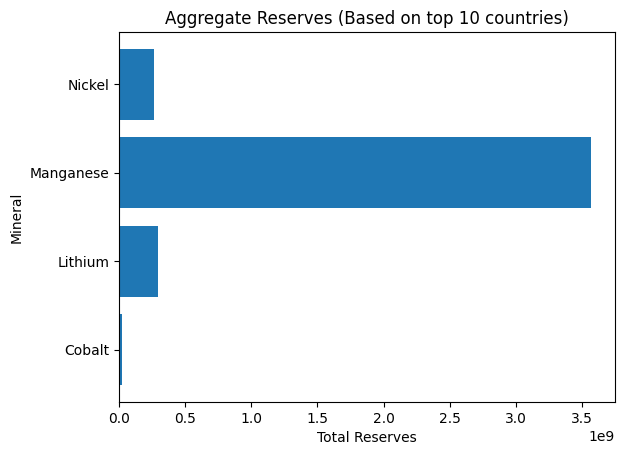

In [3]:
plt.figure()
plt.barh(y = reserves_totals['Mineral'], width = reserves_totals["Aggregate Reserves & Resources (tonnes)"])
plt.title("Aggregate Reserves (Based on top 10 countries)")
plt.xlabel("Total Reserves")
plt.ylabel("Mineral")
plt.show()

In [4]:

combined = None

mining_path = os.path.join(data_directory, "SPGlobal_MetalsAndMiningProperties-Combined-Dec-2024.xlsx")
for i, mineral in enumerate(minerals):
    data = pd.read_excel(mining_path, sheet_name = mineral)
    print(f"Read {mineral}")

    # data.dropna(subset="Primary Reserves and Resources", inplace = True)
    data["Reserves & Resources As Of Date"] = pd.to_datetime(data["Reserves & Resources As Of Date"])
    data["Primary Mineral"] = mineral
    data["Year"] = data["Reserves & Resources As Of Date"].dt.year


    if i == 0:
        combined = data
        continue

    combined = pd.concat([combined, data], ignore_index=True)

combined = combined.sort_values(by = "Year").query("`Activity Status` == 'Active'")
combined["Property ID"] = combined["Property ID"].astype(int)


Read Manganese
Read Lithium
Read Cobalt
Read Nickel
Read Lanthanides


In [5]:
locations = pd.read_excel("data/MiningPropertyLocations.xlsx")
coords = locations[["KeyMineProject","Latitude (degrees)", "Longitude (degrees)"]]

combined = combined.merge(coords, left_on = "Property ID", right_on="KeyMineProject" ,how = "inner")
combined.drop("KeyMineProject", axis=1, inplace=True, errors="ignore")
combined

,Property,Property ID,Owner(s),Country/Region,Country/Region Risk Score & Outlook,Development Stage,Activity Status,Commodity(s),Primary Reserves and Resources,Unit,Total In-Situ Value ($M),Reserves & Resources As Of Date,Primary Mineral,Year,Latitude (degrees),Longitude (degrees)
0,Lithium Two,79958,"New Age Metals Inc., Mineral Resources Ltd.",Canada,1.4 Moderate - No Change,Target Outline,Active,"Lithium, Caesium, Rubidium, Tantalum",7600,tonnes,123.180800,1947-12-31,Lithium,1947,50.61363,-95.46443
1,Falcon West,90157,Grid Metals Corp.,Canada,1.4 Moderate - No Change,Target Outline,Active,"Lithium, Caesium, Tantalum, Rubidium",4000,tonnes,64.832000,1955-12-31,Lithium,1955,49.56729,-95.68944
2,Irgon,79892,QMC Quantum Minerals Corp,Canada,1.4 Moderate - No Change,Target Outline,Active,"Lithium, Tantalum",16420,tonnes,266.135360,1956-12-31,Lithium,1956,50.60720,-95.39696
3,Chrome-Puddy,89842,"Green Bridge Metals Corp., Pavey Ark Minerals...",Canada,1.4 Moderate - No Change,Exploration,Active,"Nickel, Chromium, Copper, Cobalt, Platinum, Ir...",73482,tonnes,1384.357942,1966-12-31,Nickel,1966,49.96907,-89.52303
4,Chrome-Puddy,89842,"Green Bridge Metals Corp., Pavey Ark Minerals...",Canada,1.4 Moderate - No Change,Exploration,Active,"Nickel, Chromium, Copper, Cobalt, Platinum, Ir...",4627,tonnes,1384.357942,1966-12-31,Cobalt,1966,49.96907,-89.52303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,Brothers,90684,Critica Ltd.,Australia,1.4 Moderate - No Change,Reserves Development,Active,"Lanthanides, Dysprosium, Terbium, Thorium, U3O...",2900000,tonnes,357712.977515,2025-02-11,Lanthanides,2025,-28.43831,117.30562
657,Caldeira,90102,Meteoric Resources NL,Brazil,2.3 Elevated - No Change,Prefeas/Scoping,Active,"Lanthanides, Neodymium, Praseodymium, Terbium,...",2673400,tonnes,133670.000000,2025-03-12,Lanthanides,2025,-21.98932,-46.49532
658,Colossus,90981,Viridis Mining & Minerals Ltd.,Brazil,2.3 Elevated - No Change,Prefeas/Scoping,Active,"Lanthanides, Yttrium, U3O8, Thorium, Praseodym...",1236700,tonnes,61835.000000,2025-01-22,Lanthanides,2025,-21.86427,-46.54833
659,Browns Range,37953,Northern Minerals Ltd.,Australia,1.4 Moderate - No Change,Preproduction,Active,"Lanthanides, Dysprosium, Yttrium, Terbium, Lut...",90458,tonnes,4590.922240,2025-01-15,Lanthanides,2025,-18.96977,128.94522


In [6]:
start_year = 2010
combined = combined[combined["Year"] >= start_year]

In [7]:
from io import StringIO
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error


d = """
Year,Capacity
2010,14
2011,28
2012,38
2013,56
2014,75
2015,85
2016,111
2017,198
2018,293.7
2022,1570
2025,3970
2030,6790
"""

df = pd.read_csv(StringIO(d))
df["log_capacity"] = np.log(df["Capacity"])
df

,Year,Capacity,log_capacity
0,2010,14.0,2.639057
1,2011,28.0,3.332205
2,2012,38.0,3.637586
3,2013,56.0,4.025352
4,2014,75.0,4.317488
5,2015,85.0,4.442651
6,2016,111.0,4.709530
7,2017,198.0,5.288267
8,2018,293.7,5.682559
9,2022,1570.0,7.358831


Best degree: 3 with RMSE 0.15105632961085047


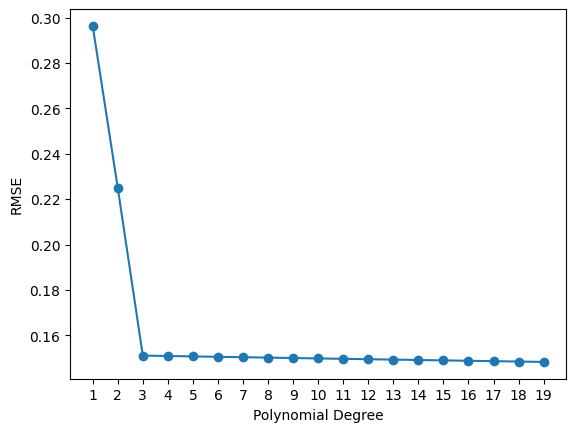

[[ 0.00000000e+00 -1.10772606e+04  5.49055450e+00 -9.07116281e-04]] [7449236.86970825]


In [8]:
errors = []
models = []
transforms = []
r = np.arange(1,20)
for d in r:
    poly = PolynomialFeatures(degree=d, include_bias=True)
    transforms.append(poly)
    X = poly.fit_transform(df[["Year"]], df["log_capacity"])
    reg = LinearRegression()
    reg.fit(X, df[["log_capacity"]].values)
    models.append(reg)
    rmse = root_mean_squared_error(df["log_capacity"],reg.predict(X))
    errors.append(rmse)


errors = np.array(errors)
differences = np.abs(np.diff(errors))
threshold = 0.001
best_index = np.argmax(differences[differences > 0] < threshold)
best_poly = transforms[best_index]
best_model = models[best_index]
print(f"Best degree: {best_index + 1} with RMSE {errors[best_index]}")

plt.plot(errors, marker="o")
plt.xticks(r - 1,labels=r)
plt.xlabel("Polynomial Degree")
plt.ylabel("RMSE")
plt.show()

print(best_model.coef_, best_model.intercept_)

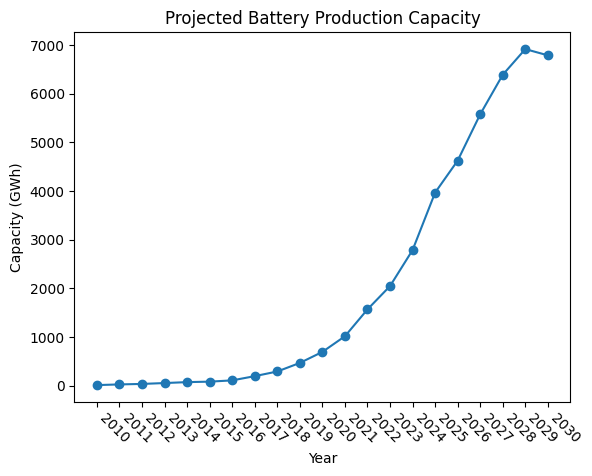

In [9]:
year_range = np.arange(df["Year"].min(), df["Year"].max())

p2 = pd.DataFrame(year_range[~np.isin(year_range, df["Year"])], columns=["Year"])
p2["log_capacity"] = best_model.predict(best_poly.transform(p2[["Year"]]))
p2["Capacity"] = np.exp(p2[["log_capacity"]])
df_full = pd.concat([df, p2], axis=0).sort_values("Year").reset_index(drop=True)
# df_full.to_excel(os.path.join(data_directory, "Capacity.xlsx"),  sheet_name="Projected Capacity", index=False)

ax = df_full.plot(x="Year", y="Capacity", marker="o")
ax.set_ylabel("Capacity (GWh)")
ax.set_xticks(df_full["Year"], df_full["Year"])
ax.tick_params(axis='x', rotation=-45)
for label in ax.get_xticklabels():
    label.set_ha('left')

plt.legend().remove()
plt.title("Projected Battery Production Capacity")
plt.show()

In [10]:
combined["Primary Mineral"].unique()

array(['Lanthanides', 'Nickel', 'Cobalt', 'Lithium', 'Manganese'],
      dtype=object)

In [11]:
reserves_over_time = combined \
        .groupby(["Reserves & Resources As Of Date", "Primary Mineral"], as_index = False)["Primary Reserves and Resources"] \
        .agg("sum")


fig = px.line(reserves_over_time, x="Reserves & Resources As Of Date", facet_col = "Primary Mineral",
        y="Primary Reserves and Resources", log_y = True, facet_col_wrap=2, facet_row_spacing=0.2)

fig.update_xaxes(title_text="Date")
fig.update_layout(title = "Total Reserves Over the Years")
fig.update_yaxes(title_text=None)
fig.show()

In [74]:
D = combined[["Year","Primary Mineral", "Primary Reserves and Resources", 'Reserves & Resources As Of Date']]

# D = D.groupby(["Year","Primary Mineral"], as_index=False).agg("sum")


# Generate a complete set of Year-Mineral combinations
# all_years = D["Year"].unique()
# all_minerals = D["Primary Mineral"].unique()
# complete_index = pd.MultiIndex.from_product([all_years, all_minerals], names=["Year", "Primary Mineral"])

# # Reindex the DataFrame to include all combinations, filling missing values with 0
# D = D.set_index(["Year", "Primary Mineral"]).reindex(complete_index, fill_value=0).reset_index()

# D["Cumulative Reserves"] = D.groupby(["Primary Mineral"], as_index=False)["Primary Reserves and Resources"].agg("cumsum")



58     2010-11
59     2010-04
60     2010-02
61     2010-02
62     2010-06
        ...   
656    2025-02
657    2025-03
658    2025-01
659    2025-01
660    2025-02
Name: Reserves & Resources As Of Date, Length: 603, dtype: period[M]

In [75]:
x = D["Reserves & Resources As Of Date"].dt.to_period('M')
D.loc[:,'Month'] = x
D = D.groupby(["Month", "Primary Mineral"], as_index=False)["Primary Reserves and Resources"].agg("sum")



# Generate a complete set of Year-Mineral combinations
all_years = D["Month"].unique()
all_minerals = D["Primary Mineral"].unique()
complete_index = pd.MultiIndex.from_product([all_years, all_minerals], names=["Month", "Primary Mineral"])

# Reindex the DataFrame to include all combinations, filling missing values with 0
D = D.set_index(["Month", "Primary Mineral"]).reindex(complete_index, fill_value=0).reset_index()

D["Cumulative Reserves"] = D.groupby(["Primary Mineral"], as_index=False)["Primary Reserves and Resources"].agg("cumsum")

/var/folders/n3/kkhdszw97tl8hc30cbvg04140000gn/T/ipykernel_72339/666272122.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [77]:
# Extend to Future Years
for yr in range(2025, 2030+1):
    latest = D[D["Month"]==f"{yr}-12"]
    latest.loc[:,"Month"] = yr
    
    D = pd.concat([D, latest], axis=0)

    

In [78]:

demand_by_cathode = pd.read_excel(os.path.join(data_directory, "Capacity.xlsx"), sheet_name="Demand by Cathode")
demand_by_cathode = demand_by_cathode[demand_by_cathode.Element != "O"]

demand_by_cathode = demand_by_cathode[~((demand_by_cathode.Element == "Li") & (demand_by_cathode["+"] == False))]
demand_by_cathode.drop(["Element", "+"], axis=1, inplace=True)

demand_by_cathode = demand_by_cathode.iloc[:,:-5] # Last 5 are redundant


In [79]:
demand_l = demand_by_cathode.melt(id_vars=["Year", "Full Element Name"], var_name="Cathode", value_name="demand").dropna()
demand_l[(demand_l["Year"] == 2011)]

,Year,Full Element Name,Cathode,demand
4,2011,Nickel,NMC622,9943.437896
5,2011,Manganese,NMC622,3102.428973
6,2011,Cobalt,NMC622,3328.032449
7,2011,Lithium,NMC622,2744.596608
88,2011,Nickel,NMC811,13257.917195
89,2011,Manganese,NMC811,1551.214486
90,2011,Cobalt,NMC811,1664.016224
91,2011,Lithium,NMC811,2747.442944
172,2011,Nickel,NMC532,8286.198247
173,2011,Manganese,NMC532,4653.643459


In [82]:
S = demand_by_cathode[demand_by_cathode["Full Element Name"] == mineral]

In [80]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

groups = D["Primary Mineral"].unique()

non_lanthanides = np.delete(groups, np.where(groups == "Lanthanides"))
F = make_subplots(rows=2, cols=2, x_title="Year", y_title="Reserves", subplot_titles=non_lanthanides.tolist())

# Define a fixed color mapping for cathode types

cathode_colors = {"NMC111": "blue", "NMC532": "green", "NMC622": "orange", "NMC811": "purple"}
mineral_colors =  ['#636efa','#EF553B', '#00cc96', '#ab63fa']


for i, mineral in enumerate(non_lanthanides):
    M = D.loc[(D["Primary Mineral"] == mineral) & (D["Cumulative Reserves"] > 0)]
    S = demand_by_cathode[demand_by_cathode["Full Element Name"] == mineral]
    
    # Add the main mineral trace with its own legend group
    F.add_trace(
        go.Scatter(
            x=M["Month"], 
            y=M["Cumulative Reserves"], 
            mode="lines+markers",
            legendgroup=mineral,
            name=mineral,
            marker=dict(
                size=10,
                color="black"
            ), 
            showlegend=True,
            legend="legend1"
        ),
        row=i // 2 + 1, 
        col=i % 2 + 1
    )
    
    # Add cathode traces grouped by cathode type
    for j,cathode in enumerate(S.columns[2:6]):
        F.add_trace(
            go.Scatter(
                x=S["Month"], 
                y=S[cathode], 
                mode="markers",
                legendgroup=cathode,  # Group by cathode type instead of mineral
                name=cathode,
                marker=dict(size=10,color=cathode_colors[cathode]),
                # Only show in legend for last mineral to avoid duplicates
                showlegend=(i == 0),
                legend="legend2",
            ),
            row=i // 2 + 1, 
            col=i % 2 + 1)
    
    # Add vertical line and annotation
    F.add_vline(x=2024, line_dash="dash", line_color="red")
    F.add_annotation(
        x=2024, 
        text="Current Year",
        showarrow=True,
        arrowhead=2,
        yshift=10,
        row=i // 2 + 1, 
        col=i % 2 + 1
    )

F.update_yaxes(type='log')
F.update_layout(title="Cumulative Growth in Reserves Over the Years",height=700,showlegend=True,
                legend1=dict(title=dict(text="Mineral")),
                legend2=dict(title=dict(text="NMC Cathodes"), y=0.1), font=dict(size=20))
F.update_annotations(font_size=20)
F.show()

KeyError: 'Month'

In [32]:
F.write_html(file="NMC_over_time.html")

In [33]:

F = make_subplots(rows=2, cols=2, x_title="Year", y_title="Reserves", 
                  subplot_titles=non_lanthanides.tolist())

# Define a fixed color mapping for cathode types

# cathode_colors = {"NMC111": "blue", "NMC532": "green", "NMC622": "orange", "NMC811": "purple"}
mineral_colors =  ['#636efa','#EF553B', '#00cc96', '#ab63fa']

for i, mineral in enumerate(non_lanthanides):
    M = D.loc[(D["Primary Mineral"] == mineral) & (D["Cumulative Reserves"] > 0)]
    S = demand_by_cathode[demand_by_cathode["Full Element Name"] == mineral]
    
    # Add the main mineral trace with its own legend group
    F.add_trace(
        go.Scatter(
            x=M["Year"], 
            y=M["Cumulative Reserves"], 
            mode="lines+markers",
            legendgroup=mineral,
            name=mineral,
            marker=dict(
                size=10,
                color="black"
            ), 
            showlegend=True,
            legend="legend1"
        ),
        row=i // 2 + 1, 
        col=i % 2 + 1
    )
    
    # Add cathode traces grouped by cathode type
    for j,cathode in enumerate(S.columns[6:]):
        F.add_trace(
            go.Scatter(
                x=S["Year"], 
                y=S[cathode], 
                mode="markers",
                legendgroup=cathode,  # Group by cathode type instead of mineral
                name=cathode,
                marker=dict(size=10),
                # Only show in legend for last mineral to avoid duplicates
                showlegend=(i == 0),
                legend="legend2",
            ),
            row=i // 2 + 1, 
            col=i % 2 + 1)
    
    # Add vertical line and annotation
    F.add_vline(x=2024, line_dash="dash", line_color="red")
    F.add_annotation(
        x=2024, 
        text="Current Year",
        showarrow=True,
        arrowhead=2,
        yshift=10,
        row=i // 2 + 1, 
        col=i % 2 + 1
    )

F.update_yaxes(type='log')
F.update_layout(title="Cumulative Growth in Reserves Over the Years",height=700,showlegend=True,
                legend1=dict(title=dict(text="Mineral")),
                legend2=dict(title=dict(text="LIB Cathodes"), y=-0.1),
                font=dict(size=20))
F.update_annotations(font_size=20)
F.show()

In [34]:
F.write_html(file="LIB_over_time.html")

In [37]:


non_lanthanides_df = combined[combined["Primary Mineral"] != "Lanthanides"]

sqrt_reserves = np.sqrt(non_lanthanides_df["Primary Reserves and Resources"])

reserve_map = px.scatter_geo(non_lanthanides_df, lat="Latitude (degrees)", lon="Longitude (degrees)", color="Primary Mineral", 
                    size=sqrt_reserves,
                    size_max=30, hover_data=["Property ID","Primary Reserves and Resources", "Country/Region"],)

reserve_map.update_layout(title="Map of Reserves",margin=dict(l=1, r=2, t=50, b=20), font=dict(size=20))
reserve_map.show()

In [39]:
reserve_map.write_html('./graphs/reserves_map.html')

In [22]:
lanthanides_df = combined[combined["Primary Mineral"] == "Lanthanides"]

sqrt_reserves = np.sqrt(lanthanides_df["Primary Reserves and Resources"])

fig = px.scatter_geo(lanthanides_df, lat="Latitude (degrees)", lon="Longitude (degrees)",
                    size=sqrt_reserves,
                    size_max=20, hover_data=["Property ID","Primary Reserves and Resources", "Country/Region"],)

fig.update_layout(title="Map of Lanthanides Reserves",margin=dict(l=5, r=5, t=30, b=30))
fig.show()

In [23]:
# fig.write_html(file="graphs/reserves_map.html")

In [24]:

C = combined.copy()
usca = C[C["Primary Mineral"].isin(["Cobalt", "Nickel", "Manganese"]) & 
         C["Country/Region"].isin(["USA", "Canada"])]
usca

,Property,Property ID,Owner(s),Country/Region,Country/Region Risk Score & Outlook,Development Stage,Activity Status,Commodity(s),Primary Reserves and Resources,Unit,Total In-Situ Value ($M),Reserves & Resources As Of Date,Primary Mineral,Year,Latitude (degrees),Longitude (degrees)
59,Nunavik,31715,"Ji Lin Ji En Nickel Industry C, Nearctic Nick...",Canada,1.4 Moderate - No Change,Limited Production,Active,"Nickel, Copper, Cobalt, Platinum, Palladium, Gold",350200,tonnes,13878.648712,2010-04-14,Nickel,2010,61.420856,-74.13750
63,Raglan,35769,Ji Lin Ji En Nickel Industry C,Canada,1.4 Moderate - No Change,Reserves Development,Active,"Nickel, Copper, Platinum, Palladium, Cobalt, Gold",44000,tonnes,1207.141910,2010-11-04,Nickel,2010,61.397820,-74.97753
71,Raglan,35769,Ji Lin Ji En Nickel Industry C,Canada,1.4 Moderate - No Change,Reserves Development,Active,"Nickel, Copper, Platinum, Palladium, Cobalt, Gold",2233,tonnes,1207.141910,2010-11-04,Cobalt,2010,61.397820,-74.97753
73,Nunavik,31715,"Ji Lin Ji En Nickel Industry C, Nearctic Nick...",Canada,1.4 Moderate - No Change,Limited Production,Active,"Nickel, Copper, Cobalt, Platinum, Palladium, Gold",18670,tonnes,13878.648712,2010-04-14,Cobalt,2010,61.420856,-74.13750
75,Shining Tree,34245,Private Interest,Canada,1.4 Moderate - No Change,Reserves Development,Active,"Nickel, Copper, Cobalt, Platinum, Palladium",651,tonnes,385.361244,2011-05-18,Cobalt,2011,47.565400,-81.17918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,Nikolai,32184,Alaska Energy Metals Corp.,USA,1.5 Moderate - No Change,Reserves Development,Active,"Nickel, Copper, Cobalt, Platinum, Palladium, G...",3675002,tonnes,88655.366125,2024-02-12,Nickel,2024,63.276410,-146.29058
616,Minago,27222,Norway House Cree Nation,Canada,1.4 Moderate - No Change,Feasibility Started,Active,"Nickel, Copper, Cobalt, Palladium, Frac Sand, ...",391885,tonnes,6971.333721,2024-03-18,Nickel,2024,54.112770,-99.16678
617,Deloro,88428,Canada Nickel Co.,Canada,1.4 Moderate - No Change,Reserves Development,Active,"Nickel, Palladium, Platinum, Cobalt, Chromium,...",46600,tonnes,19798.257552,2024-07-17,Cobalt,2024,48.403770,-81.25800
618,Crean Hill,38359,Magna Mining Inc.,Canada,1.4 Moderate - No Change,Prefeas/Scoping,Active,"Nickel, Copper, Platinum, Palladium, Cobalt, Gold",9890,tonnes,9769.824656,2024-04-15,Cobalt,2024,46.429440,-81.34988


In [25]:
usca_map = px.scatter_geo(usca, lat="Latitude (degrees)", lon="Longitude (degrees)", color="Primary Mineral", 
                    size_max=20, hover_data=["Property ID","Primary Reserves and Resources", "Country/Region", 
                                             "Commodity(s)"],
                    )

usca_map.update_layout(
    geo=dict(
        
        showland=True,
        landcolor="rgb(217, 217, 217)",
        lonaxis=dict(range=[usca["Longitude (degrees)"].min() - 10, usca["Longitude (degrees)"].max() + 10]),  # Adjust padding
        lataxis=dict(range=[usca["Latitude (degrees)"].min() - 10, usca["Latitude (degrees)"].max() + 10]),  # Adjust padding
    )
)

In [26]:
import networkx as nx
from geopy.distance import geodesic
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import LabelEncoder

def build(df, max_distance_per_cluster=5000, alpha=0.6, beta=1 - 0.6): 
    
    simplified_df = df.rename(columns={
        'Latitude (degrees)': 'Lat', 
        'Longitude (degrees)': 'Lon',
        'Primary Reserves and Resources': 'Reserves',
        'Property ID': 'ID',
        'Property': 'Name'
    })

    # simplified_df['Normalized_Reserves'] = simplified_df['Reserves'] / simplified_df['Reserves'].max()
    coords = simplified_df[['Lat', 'Lon']]
    clustering = DBSCAN(eps=2).fit(coords)
    simplified_df['Cluster'] = clustering.labels_

    fig = go.Figure()
    required_metals = {"Cobalt", "Nickel", "Manganese"}

    def check_coverage(sites):
        found = set()
        for s in sites:
            for metal in required_metals:
                if metal.lower() in s['Commodity(s)'].lower():
                    found.add(metal)
        return required_metals.issubset(found)

    for cluster in simplified_df['Cluster'].unique():
        cluster_data = simplified_df[simplified_df['Cluster'] == cluster].copy()
        if cluster_data.empty:
            continue

        fig.add_trace(go.Scattergeo(
            lon=cluster_data['Lon'],
            lat=cluster_data['Lat'],
            customdata=cluster_data[['Reserves', 'Name', 'Commodity(s)', "Primary Mineral"]],
            mode='markers+text',
            hovertemplate="<b>%{customdata[1]}</b><br>" +
                          "Latitude: %{lat}<br>" +
                          "Longitude: %{lon}<br>" +
                          "Commodities: %{customdata[2]}<br>" +
                          "Primary Commodity: %{customdata[3]}<br>" +
                          "Reserves: %{customdata[0]:,.0f} tonnes",
            textposition="bottom center",
            marker=dict(size=8, symbol='circle'),
            name=f'Cluster {cluster}'
        ))

        # Greedy selection algorithm with metal constraint
        mines = cluster_data.to_dict(orient='records')
        start = max(mines, key=lambda x: x['Reserves'])

        visited = [start]
        unvisited = [m for m in mines if m['ID'] != start['ID']]
        total_distance = 0

        while unvisited:
            best_mine = None
            best_cost = float('inf')
            best_distance = None

            for candidate in unvisited:
                dist = geodesic(
                    (visited[-1]['Lat'], visited[-1]['Lon']),
                    (candidate['Lat'], candidate['Lon'])
                ).km

                if dist == 0 or candidate['Reserves'] == 0:
                    continue

              
                cost = alpha * dist + beta * (1 / candidate['Reserves'])

                if cost < best_cost:
                    best_cost = cost
                    best_mine = candidate
                    best_distance = dist

            if best_distance and total_distance + best_distance <= max_distance_per_cluster:
                total_distance += best_distance
                visited.append(best_mine)
                unvisited = [u for u in unvisited if u['ID'] != best_mine['ID']]
            else:
                break

            if check_coverage(visited):
                break

        # Try adding backup mines just to fulfill constraints
        if not check_coverage(visited):
            for backup in sorted(unvisited, key=lambda x: -x['Reserves']):
                dist = geodesic(
                    (visited[-1]['Lat'], visited[-1]['Lon']),
                    (backup['Lat'], backup['Lon'])
                ).km
                if total_distance + dist > max_distance_per_cluster:
                    continue
                visited.append(backup)
                total_distance += dist
                if check_coverage(visited):
                    break

        # Draw path
        for i in range(len(visited) - 1):
            node1 = visited[i]
            node2 = visited[i + 1]
            fig.add_trace(go.Scattergeo(
                lon=[node1['Lon'], node2['Lon']],
                lat=[node1['Lat'], node2['Lat']],
                mode='lines',
                line=dict(width=2, color='gray'),
                showlegend=False
            ))

    fig.update_layout(
        title="Constraint-Aware Resource Route: Covering Key Metals",
        margin=dict(l=5, r=5, t=30, b=30),
        geo=dict(
            scope='world',
            showland=True,
            landcolor='lightgray',
            countrycolor='white',
            lonaxis=dict(range=[simplified_df["Lon"].min() - 10, simplified_df["Lon"].max() + 10]),
            lataxis=dict(range=[simplified_df["Lat"].min() - 10, simplified_df["Lat"].max() + 10])
        ),
        template="plotly_white"
    )

    fig.show()


In [27]:
build(usca)

In [28]:
import networkx as nx
from geopy.distance import geodesic
import numpy as np

G = nx.Graph()

# Add nodes
for _, row in usca.iterrows():
    G.add_node(row["Property ID"], primary_mineral=row["Primary Mineral"], name=row["Property"], 
               pos=(row["Latitude (degrees)"], row["Longitude (degrees)"]), 
               reserves=row["Primary Reserves and Resources"])

# Add weighted edges
for i, row1 in usca.iterrows():
    for j, row2 in usca.iterrows():
        if i < j:  # Avoid duplicate edges
            dist = geodesic((row1["Latitude (degrees)"], row1["Longitude (degrees)"]), 
                            (row2["Latitude (degrees)"], row2["Longitude (degrees)"])).km
            weight = dist / np.log(row1["Primary Reserves and Resources"])
         
            G.add_edge(row1["Property ID"], row2["Property ID"], weight=weight)

# Compute Minimum Spanning Tree (MST)
mst = nx.minimum_spanning_tree(G, weight='weight')



In [29]:
import plotly.graph_objects as go
import networkx as nx

def plot_graph(graph):
    # Extract latitude and longitude from nodes
    latitudes = [graph.nodes[node]['pos'][0] for node in graph.nodes]
    longitudes = [graph.nodes[node]['pos'][1] for node in graph.nodes]

    # Get min/max bounds for zooming into relevant region
    lat_min, lat_max = min(latitudes), max(latitudes)
    lon_min, lon_max = min(longitudes), max(longitudes)

    # Create edge traces
    edge_traces = []
    for edge in graph.edges():
        edge_traces.append(go.Scattergeo(
            lon=[graph.nodes[edge[0]]['pos'][1], graph.nodes[edge[1]]['pos'][1], None],
            lat=[graph.nodes[edge[0]]['pos'][0], graph.nodes[edge[1]]['pos'][0], None],
            mode='lines',
            line=dict(width=1, color='gray'),
            hoverinfo='none',
            showlegend=False
        ))

    # Create node traces grouped by primary mineral
    unique_minerals = set(nx.get_node_attributes(graph, 'primary_mineral').values())
    node_traces = []
    
    for mineral in unique_minerals:
        nodes = [node for node in graph.nodes if graph.nodes[node]['primary_mineral'] == mineral]
        node_lat = [graph.nodes[node]['pos'][0] for node in nodes]
        node_lon = [graph.nodes[node]['pos'][1] for node in nodes]
        node_text = [f"{graph.nodes[node]['name']}<br>"
                     f"Primary Mineral: {mineral}<br>"
                     f"Reserves: {graph.nodes[node]['reserves']}<br>" 
                     f"Location: {graph.nodes[node]['pos']}" 
                     
                     
                     for node in nodes]

        node_traces.append(go.Scattergeo(
            lon=node_lon, lat=node_lat,
            mode='markers',
            marker=dict(size=8),
            name=mineral,
            text=node_text,
            hoverinfo='text'
        ))

    # Construct figure
    return go.Figure(
        data=edge_traces + node_traces,
        layout=go.Layout(
            title="NMC in USA and Canada",
            showlegend=True,
            margin=dict(l=5, r=5, t=30, b=30),
            geo=dict(
                projection_type="natural earth",
                
                showcoastlines=True,
                lonaxis=dict(range=[lon_min - 10, lon_max + 10]),  # Adjust padding
                lataxis=dict(range=[lat_min - 10, lat_max + 10]),  # Adjust padding
            )
        )
    )


In [30]:
plot_graph(mst)